In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

df = pd.read_csv("main_data_processed_stripped.csv")

In [20]:
response_mapping = {
    "Strongly agree": 5,
    "Somewhat agree": 4,
    "Neither agree nor disagree": 3,
    "Somewhat disagree": 2,
    "Strongly disagree": 1,
}

In [63]:
# Reapply the mapping and handle unmapped values explicitly
trust_data = df[['trust', 'general_trust']].copy()
trust_data['trust'] = trust_data['trust'].map(response_mapping)
trust_data['general_trust'] = trust_data['general_trust'].map(response_mapping)

# Drop rows with missing values after the mapping
trust_data = trust_data.dropna()

# Recalculate basic statistics and correlation
trust_stats = trust_data.describe()
print(trust_stats)
print(trust_data.median())
print(trust_data.mode())
trust_correlation = trust_data.corr()
print(trust_correlation)

            trust  general_trust
count  294.000000     294.000000
mean     3.840136       3.340136
std      0.976667       1.011852
min      1.000000       1.000000
25%      3.000000       3.000000
50%      4.000000       4.000000
75%      4.000000       4.000000
max      5.000000       5.000000
trust            4.0
general_trust    4.0
dtype: float64
   trust  general_trust
0      4              4
                 trust  general_trust
trust          1.00000        0.29696
general_trust  0.29696        1.00000


In [53]:
import numpy as np
np.quantile(trust_data["trust"], 0.75)

4.0

In [8]:
trust_parity = trust_data[(trust_data["general_trust"] < 3) & (trust_data["trust"] >= 3)]

In [9]:
trust_parity.describe()

,trust,general_trust
count,50.000000,50.000000
mean,3.860000,1.880000
std,0.670364,0.328261
min,3.000000,1.000000
25%,3.000000,2.000000
50%,4.000000,2.000000
75%,4.000000,2.000000
max,5.000000,2.000000


In [23]:
from scipy.stats import mannwhitneyu

mannwhitneyu(trust_data["trust"], trust_data["general_trust"], alternative='greater')

MannwhitneyuResult(statistic=55507.5, pvalue=1.0656697718177726e-10)

<Axes: xlabel='general_trust', ylabel='count'>

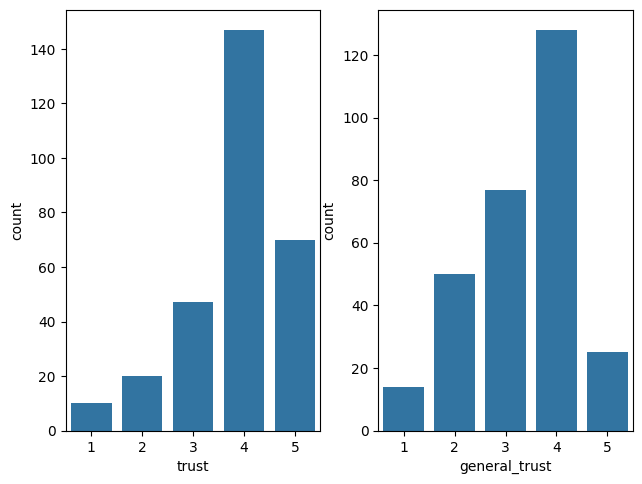

In [32]:
import seaborn as sns

fig, axs = plt.subplots(ncols=2)
fig.tight_layout()

sns.countplot(x="trust", data=trust_data, ax=axs[0])
sns.countplot(x="general_trust", data=trust_data, ax=axs[1])

In [54]:
# Reapply the mapping and handle unmapped values explicitly
safety_data = df[['safe', 'general_safe']].copy()
safety_data['safe'] = safety_data['safe'].map(response_mapping)
safety_data['general_safe'] = safety_data['general_safe'].map(response_mapping)

# Drop rows with missing values after the mapping
safety_data = safety_data.dropna()

# Recalculate basic statistics and correlation
safety_stats = safety_data.describe()
print(safety_stats)
print(safety_data.median())
print(safety_data.mode())
safety_correlation = safety_data.corr()
print(safety_correlation)

             safe  general_safe
count  294.000000    294.000000
mean     3.931973      3.428571
std      1.016316      1.051571
min      1.000000      1.000000
25%      4.000000      3.000000
50%      4.000000      4.000000
75%      5.000000      4.000000
max      5.000000      5.000000
safe            4.0
general_safe    4.0
dtype: float64
   safe  general_safe
0     4             4
                  safe  general_safe
safe          1.000000      0.397817
general_safe  0.397817      1.000000


<Axes: xlabel='general_safe', ylabel='count'>

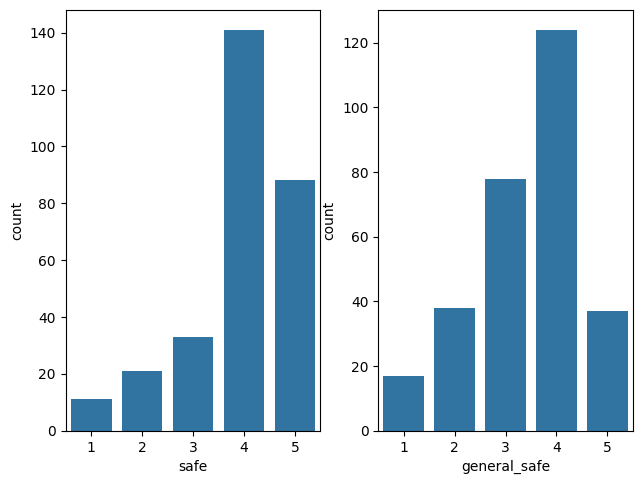

In [37]:
import seaborn as sns

fig, axs = plt.subplots(ncols=2)
fig.tight_layout()

sns.countplot(x="safe", data=safety_data, ax=axs[0])
sns.countplot(x="general_safe", data=safety_data, ax=axs[1])

In [39]:
safety_data[(safety_data["safe"] > 3) & (safety_data["general_safe"] <= 3)].shape

(92, 2)

In [41]:
from scipy.stats import mannwhitneyu

mannwhitneyu(safety_data["safe"], safety_data["general_safe"], alternative='greater')

MannwhitneyuResult(statistic=55690.5, pvalue=7.0523794887977e-11)

In [45]:
improved_perception = df["improved_perception"]
improved_perception = improved_perception.map(response_mapping)

In [49]:
improved_perception.value_counts()

improved_perception
4    122
5     94
3     51
2     19
1      8
Name: count, dtype: int64

In [72]:
intent_comm = df["intent_communication_makes_user_comfortable"].map(response_mapping)
intent_comm.describe()

count    294.000000
mean       4.340136
std        0.800994
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: intent_communication_makes_user_comfortable, dtype: float64

In [73]:
intent_comm.median()

4.0

## Cronbach's Alpha

In [70]:
import pingouin as pg

social_behaviour = df[["trust", "safe", "improved_perception", "displayed_social_behaviours"]].copy()
for col in social_behaviour.columns:
    social_behaviour[col] = social_behaviour[col].map(response_mapping)

alpha, _ = pg.cronbach_alpha(social_behaviour)
print(f'Cronbach\'s alpha: {alpha:.2f}')

Cronbach's alpha: 0.87
